<a href="https://colab.research.google.com/github/VaideswarReddy/Online-Retail-Customer-Segmentation/blob/main/Vaideswar_Reddy_Online_Retail_Customer_Segmentation_Team_4_Capstone_Project_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [63]:
df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Copy of Online Retail.xlsx')

In [64]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [65]:
df.shape

(541909, 8)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [67]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [68]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [69]:
df.Quantity.value_counts()

 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
 1287         1
-5368         1
 267          1
-244          1
 512          1
Name: Quantity, Length: 722, dtype: int64

In [70]:
df.UnitPrice.value_counts()

1.25       50496
1.65       38181
0.85       28497
2.95       27768
0.42       24533
           ...  
4575.64        1
125.96         1
147.13         1
3060.60        1
244.51         1
Name: UnitPrice, Length: 1630, dtype: int64

In [71]:
df.dropna(inplace=True)

In [72]:
df.shape

(406829, 8)

In [73]:
indx = df.InvoiceNo[df.InvoiceNo.str.contains('C') == True].index
df.drop(index= indx, inplace= True)

In [74]:
indx = df.loc[df.UnitPrice == 0].index
df.drop(index= indx, inplace= True)

In [75]:
df.shape

(397884, 8)

In [20]:
df['Country'].value_counts().reset_index()

,index,Country
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


In [21]:
c_df = df['Country'].value_counts().reset_index()

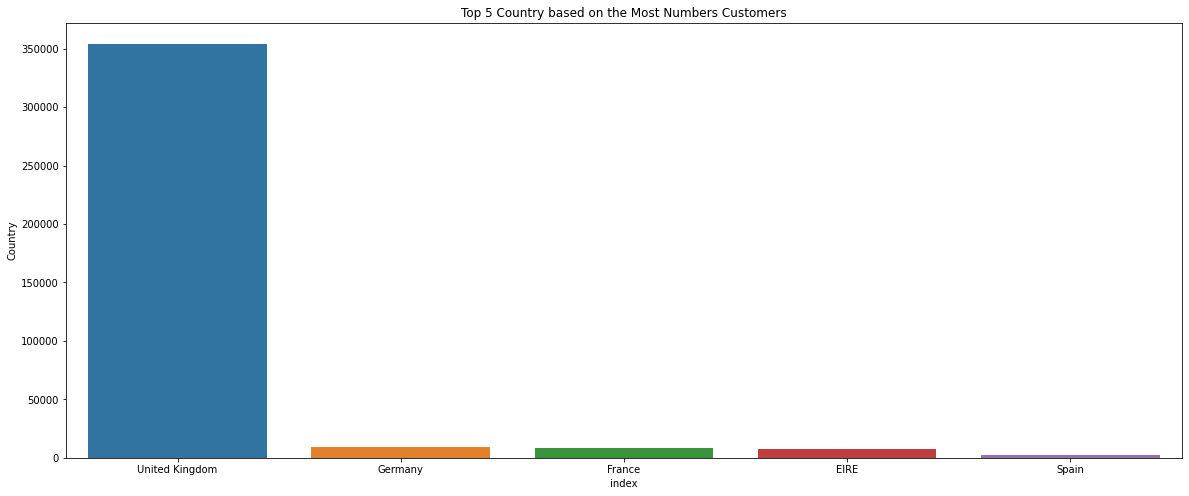

In [22]:
plt.figure(figsize=(20,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='index',y='Country',data=c_df[:5])


In [23]:
df[df['Country']=='United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [24]:
df[df['Country']=='Germany']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany


In [25]:
df[df['Country']=='France']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [26]:
df[df['Country']=='EIRE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE
...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE


In [27]:
df[df['Country']=='Spain']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6421,536944,22383,LUNCH BAG SUKI DESIGN,70,2010-12-03 12:20:00,1.65,12557.0,Spain
6422,536944,22384,LUNCH BAG PINK POLKADOT,100,2010-12-03 12:20:00,1.45,12557.0,Spain
6423,536944,20727,LUNCH BAG BLACK SKULL.,60,2010-12-03 12:20:00,1.65,12557.0,Spain
6424,536944,20725,LUNCH BAG RED RETROSPOT,70,2010-12-03 12:20:00,1.65,12557.0,Spain
6425,536944,20728,LUNCH BAG CARS BLUE,100,2010-12-03 12:20:00,1.45,12557.0,Spain
...,...,...,...,...,...,...,...,...
535271,581193,23291,DOLLY GIRL CHILDRENS CUP,2,2011-12-07 17:05:00,1.25,17097.0,Spain
535272,581193,85232D,SET/3 DECOUPAGE STACKING TINS,1,2011-12-07 17:05:00,4.95,17097.0,Spain
535273,581193,22721,SET OF 3 CAKE TINS SKETCHBOOK,2,2011-12-07 17:05:00,1.95,17097.0,Spain
535274,581193,23241,TREASURE TIN GYMKHANA DESIGN,1,2011-12-07 17:05:00,2.08,17097.0,Spain


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


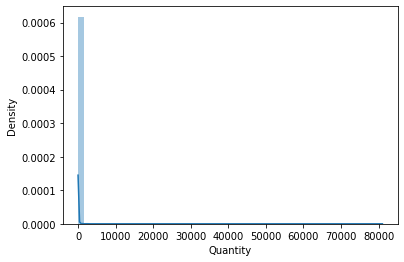

In [28]:
sns.distplot(df.Quantity)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


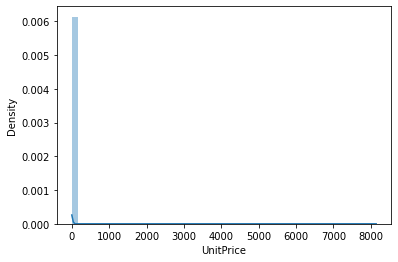

In [29]:
sns.distplot(df.UnitPrice)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


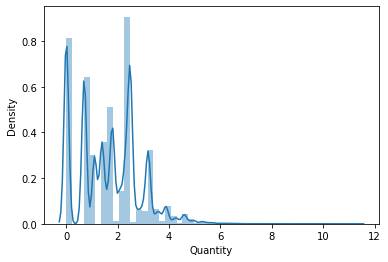

In [30]:
sns.distplot(np.log(df.Quantity))

In [94]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [95]:
df['Day']=df['InvoiceDate'].dt.day_name()

In [96]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [76]:
# df['Transaction_time'] = df.InvoiceDate.apply(lambda x : x.time().hour)

In [97]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_time,Transaction_date,Recency,First_purchase,TotalAmount,Day,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2010-12-01,0,0,15.30,Wednesday,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2010-12-01,0,0,22.00,Wednesday,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26


In [78]:
# df['Transaction_date'] = df.InvoiceDate.apply(lambda x : x.date())
# df['Transaction_date'] = df.Transaction_date.apply(lambda x: x.replace(day = 1))

In [98]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_time,Transaction_date,Recency,First_purchase,TotalAmount,Day,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2010-12-01,0,0,15.30,Wednesday,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2010-12-01,0,0,22.00,Wednesday,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26


In [111]:
# calculate the no. of months since transaction date
ref = datetime.strptime('2010-12', '%Y-%m')
df['Months_since_purchase'] = df.Transaction_date.apply(lambda x: \
                                        relativedelta(ref,x).years*12 + relativedelta(ref,x).months)
Recency = df.groupby('CustomerID').agg({'Months_since_purchase' : 'min'})
df = df.rename(columns= {'Months_since_purchase':'Recency'})

In [100]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_time,Transaction_date,Recency,First_purchase,TotalAmount,Day,year,month_num,day_num,hour,minute,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2010-12-01,0,0,15.30,Wednesday,2010,12,1,8,26,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2010-12-01,0,0,22.00,Wednesday,2010,12,1,8,26,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26,0


In [110]:

df['First_purchase'] = df['Recency'].copy()
First_purchase = df.groupby('CustomerID').agg({'First_purchase' : 'max'}).copy()

In [102]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_time,Transaction_date,Recency,First_purchase,TotalAmount,Day,year,month_num,day_num,hour,minute,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2010-12-01,0,0,15.30,Wednesday,2010,12,1,8,26,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2010-12-01,0,0,20.34,Wednesday,2010,12,1,8,26,0


In [103]:
Frequency = df.groupby(['CustomerID',
                    'Transaction_date']).agg({'InvoiceNo' : 'nunique'}).groupby(['CustomerID']).agg({'InvoiceNo' : 'mean'}).copy().rename(columns= {'InvoiceNo':'Frequency'})

In [104]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']


In [105]:
Monetary_value = df.groupby(['CustomerID',
                    'InvoiceNo']).agg({'TotalAmount' : 'sum'}).groupby(['CustomerID']).agg({'TotalAmount' : 'mean'}).copy().rename(columns= {'InvoiceNo':'Frequency',
                                                              'TotalAmount': 'Monetary_value'})

In [109]:
unique_items = df.groupby(['CustomerID', 'InvoiceNo']).agg({'StockCode': 'nunique'}).groupby(['CustomerID']\
            ).agg({'StockCode':'mean'}).rename(columns={'StockCode': 'Unique_items'})

In [107]:
df_transformed = pd.concat([Recency, First_purchase, Frequency, Monetary_value,unique_items], axis=1)


In [108]:
df_transformed.head()

,Months_since_purchase,First_purchase,Frequency,Monetary_value,Unique_items
CustomerID,,,,,
12346.0,-1,-1,1.0,77183.600000,1.00
12347.0,-12,0,1.0,615.714286,26.00
12348.0,-9,0,1.0,449.310000,6.75
12349.0,-11,-11,1.0,1757.550000,73.00
12350.0,-2,-2,1.0,334.400000,17.00


In [90]:
df_transformed = df_transformed.rename(columns={'Months_since_purchase':'Recency',})

In [91]:
df_transformed.describe()

,Recency,First_purchase,Frequency,Monetary_value,Unique_items
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,-8.777547,-4.515675,1.225594,419.166289,21.513573
std,3.284536,3.817168,0.765747,1796.537944,19.075822
min,-12.000000,-12.000000,1.000000,3.450000,1.000000
25%,-11.000000,-8.000000,1.000000,178.625000,9.375000
50%,-10.000000,-4.000000,1.000000,293.900000,16.839744
75%,-7.000000,-1.000000,1.250000,430.113750,27.642857
max,0.000000,0.000000,34.000000,84236.250000,298.823529


In [92]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
df_transformed['Recency'] = [handle_neg_n_zero(x) for x in df_transformed.Recency]
df_transformed['Monetary_value'] = [handle_neg_n_zero(x) for x in df_transformed.Monetary_value]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = df_transformed[['Recency', 'Frequency', 'Monetary_value']].apply(np.log, axis = 1).round(3)

In [93]:
from numpy import math
from sklearn import preprocessing
df_transformed['Recency_log'] = df_transformed['Recency'].apply(np.log)
df_transformed['Frequency_log'] = df_transformed['Frequency'].apply(np.log)
df_transformed['Monetary_log'] = df_transformed['Monetary_value'].apply(np.log)


For n_clusters = 2 The average silhouette_score is : 0.5390001861789189
For n_clusters = 3 The average silhouette_score is : 0.5254567393859462
For n_clusters = 4 The average silhouette_score is : 0.5323794883328414
For n_clusters = 5 The average silhouette_score is : 0.5148253484311991
For n_clusters = 6 The average silhouette_score is : 0.5312505265977467
For n_clusters = 7 The average silhouette_score is : 0.5257741990101643
For n_clusters = 8 The average silhouette_score is : 0.5308824292355627
For n_clusters = 9 The average silhouette_score is : 0.529173993600537
For n_clusters = 10 The average silhouette_score is : 0.5314881015562329


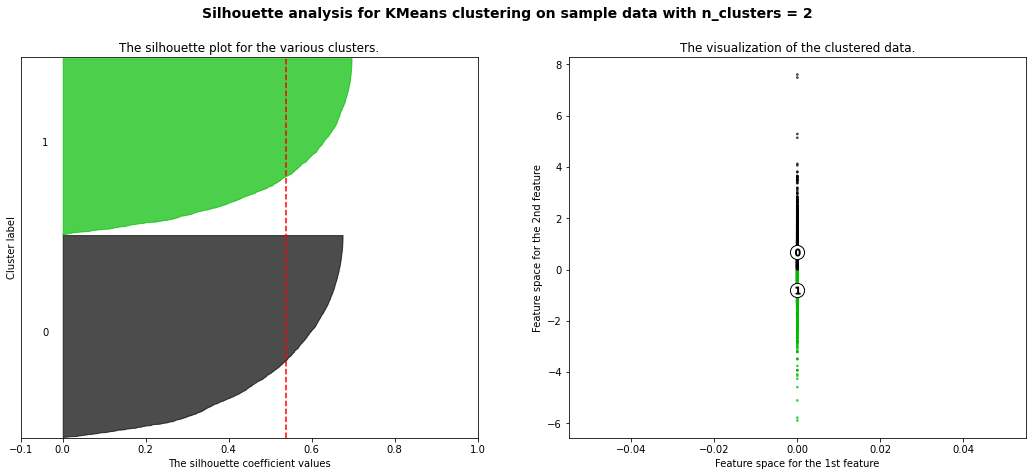

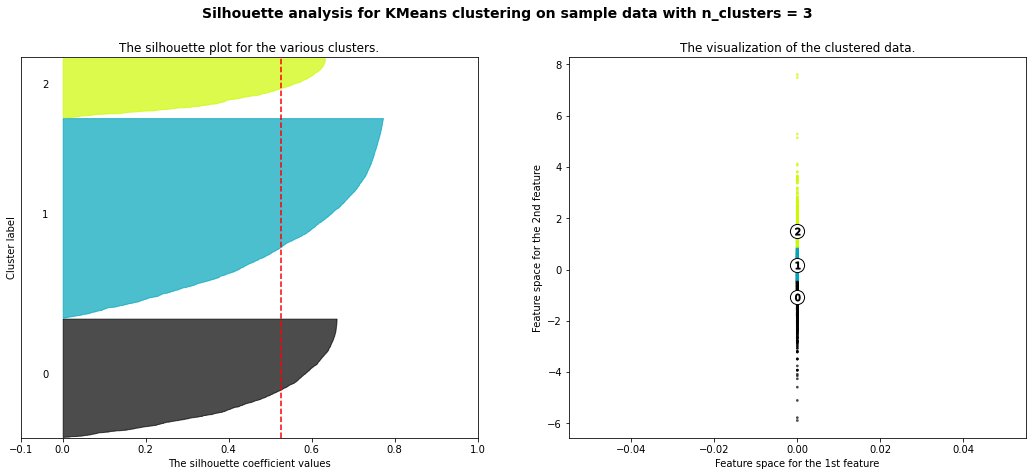

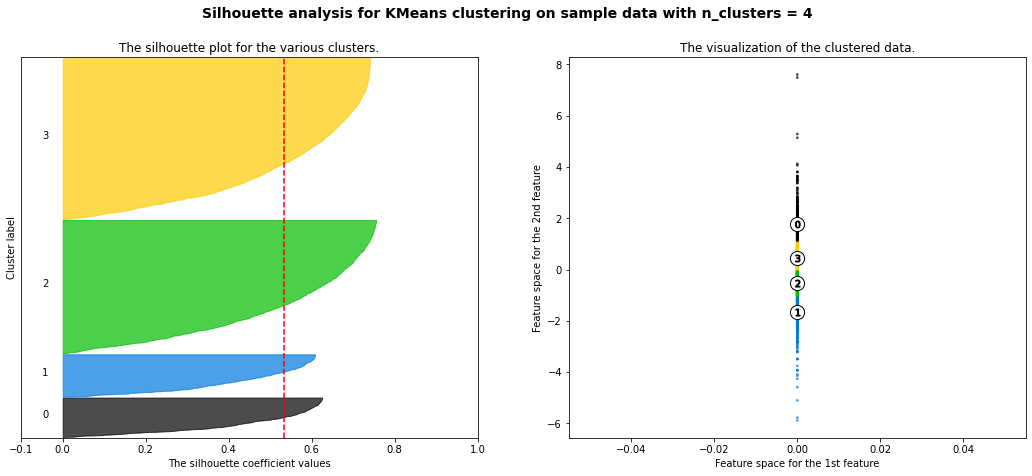

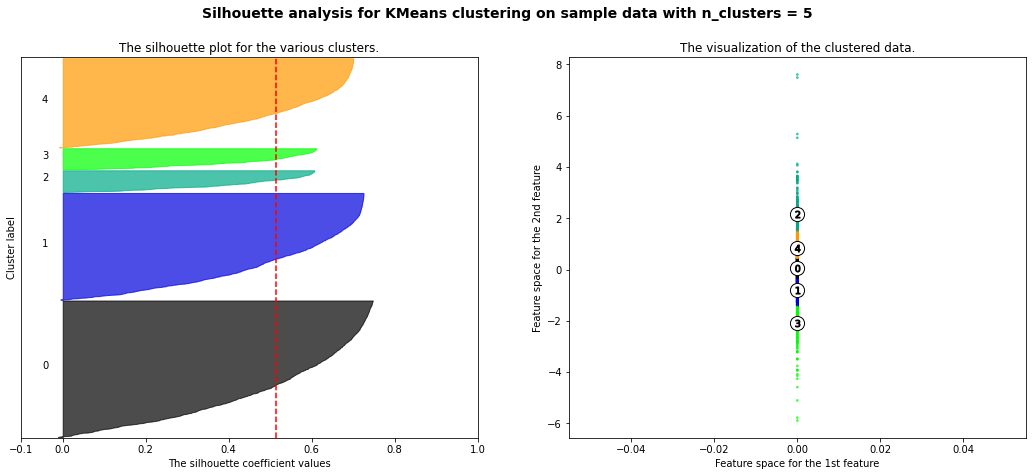

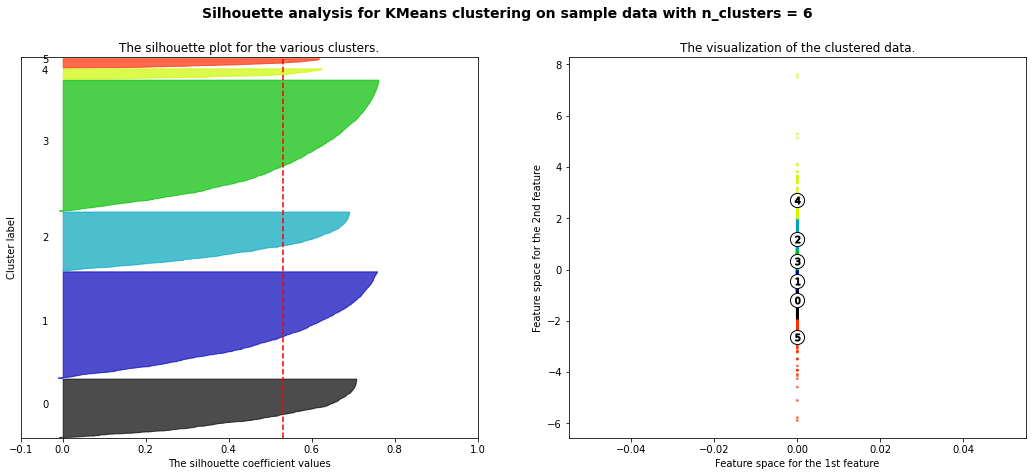

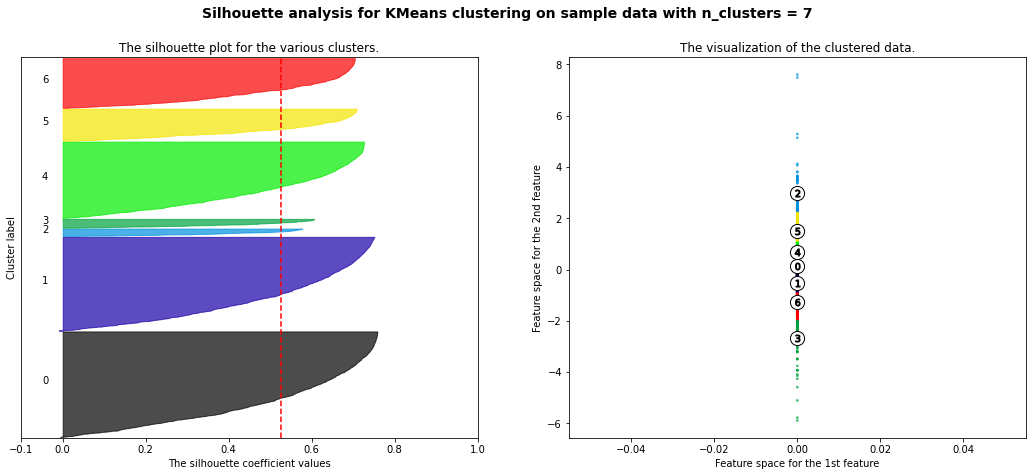

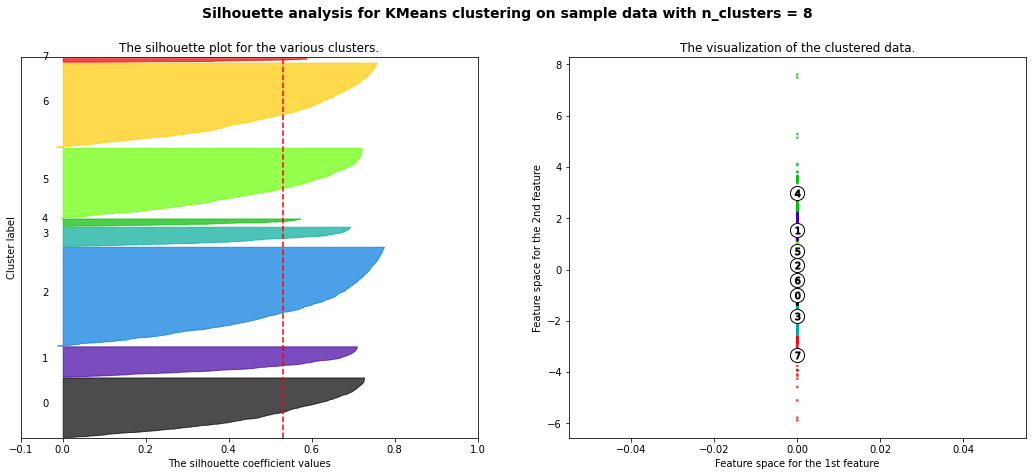

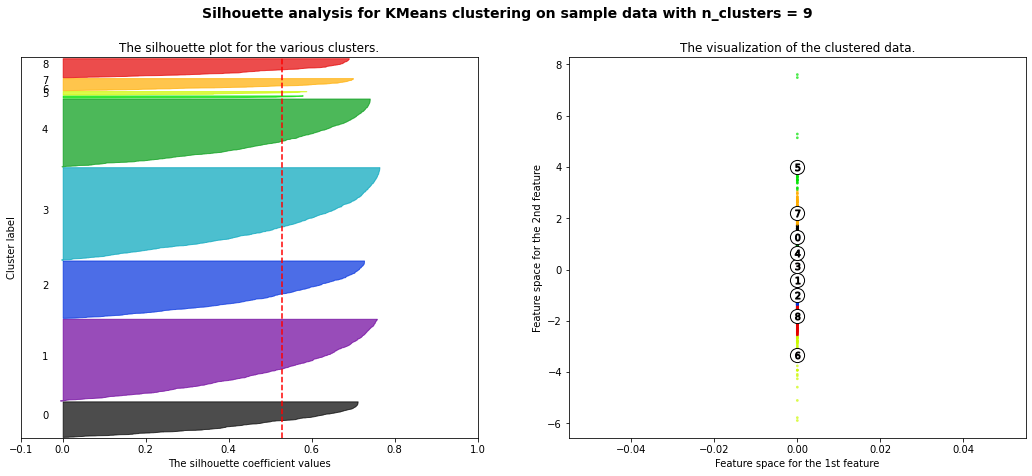

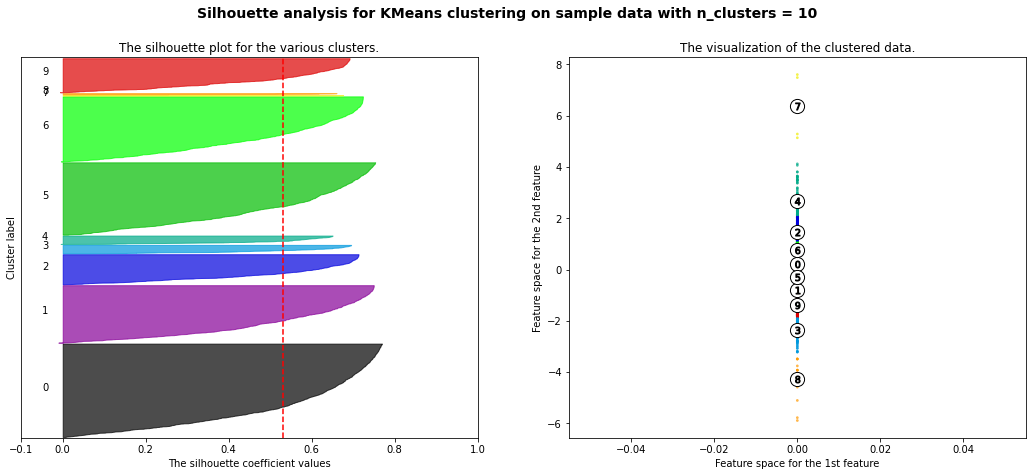

In [51]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=df_transformed[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

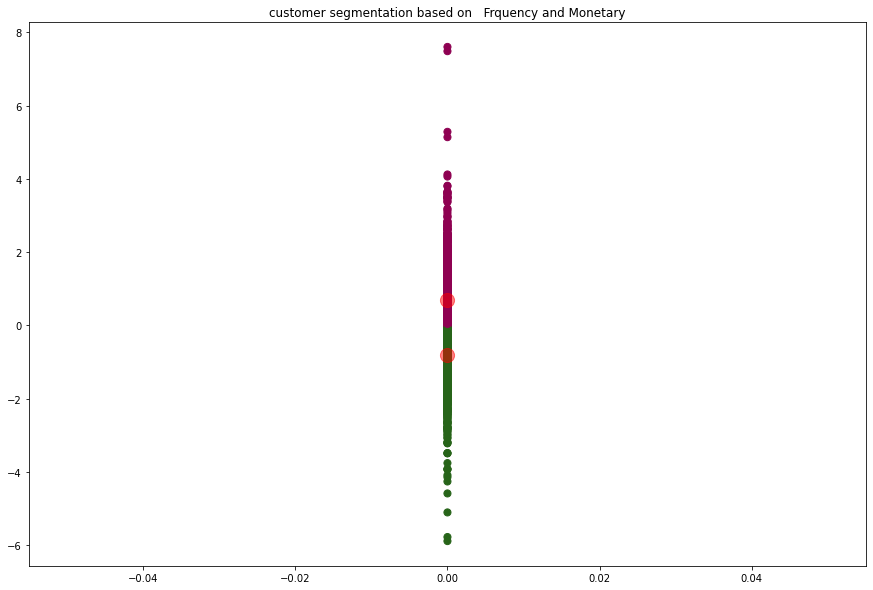

In [53]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frquency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

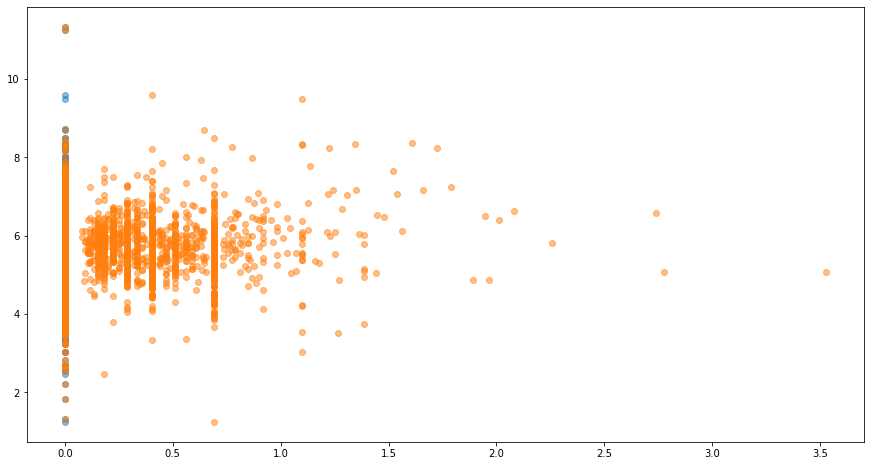

In [54]:
plt.figure(figsize=(15,8))
plt.scatter(df_transformed.Recency_log,df_transformed.Monetary_log,alpha=0.5)
plt.scatter(df_transformed.Frequency_log,df_transformed.Monetary_log,alpha=0.5)

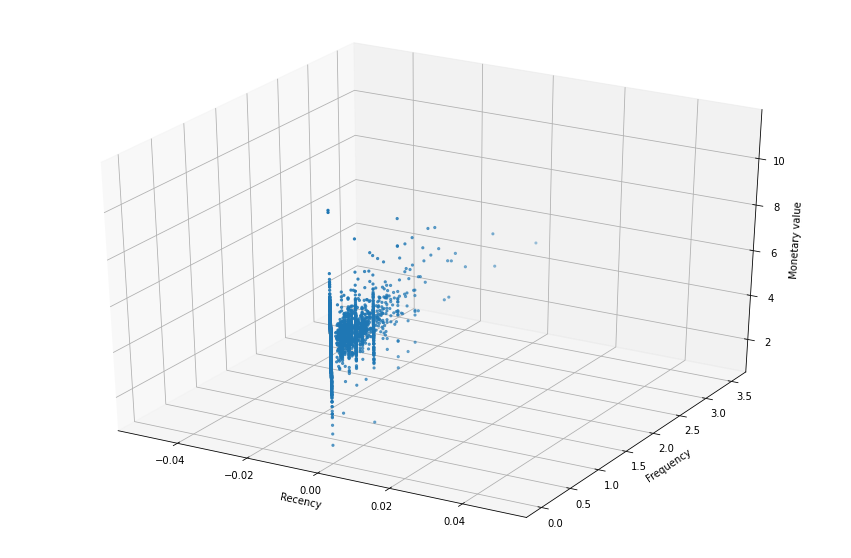

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
xs=df_transformed.Recency_log
ys=df_transformed.Frequency_log
zs=df_transformed.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [56]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=df_transformed[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

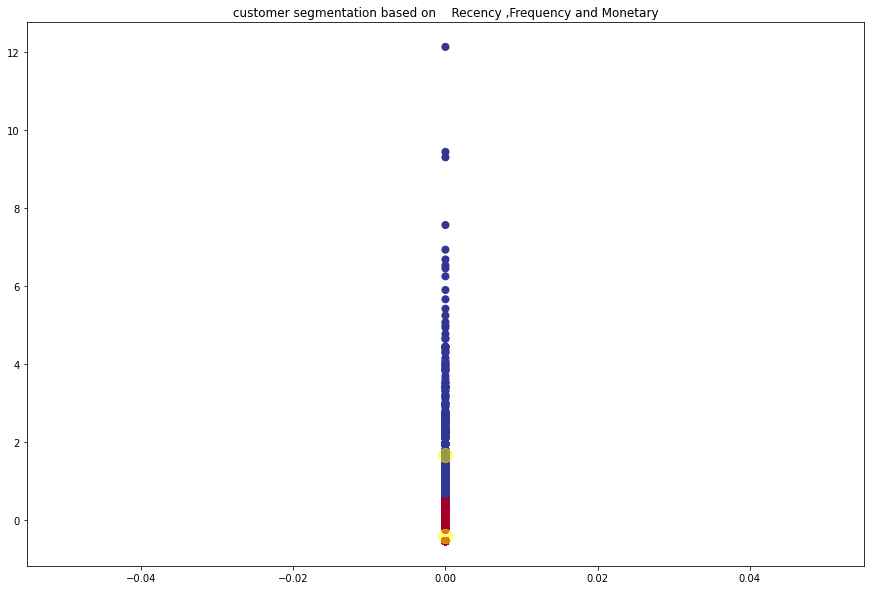

In [59]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

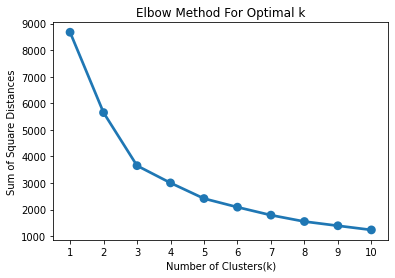

In [60]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [62]:
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)
df_transformed['Cluster'] = KMean_clust.labels_
df_transformed.head()

,Recency,First_purchase,Frequency,Monetary_value,Unique_items,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,
12346.0,1,-1,1.0,77183.600000,1.00,0.0,0.0,11.253942,0
12347.0,1,0,1.0,615.714286,26.00,0.0,0.0,6.422783,0
12348.0,1,0,1.0,449.310000,6.75,0.0,0.0,6.107713,0
12349.0,1,-11,1.0,1757.550000,73.00,0.0,0.0,7.471676,0
12350.0,1,-2,1.0,334.400000,17.00,0.0,0.0,5.812338,0
